In [29]:
pip install matplotlib seaborn pandas numpy scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv("C:\\Users\\Padmavathi\\OneDrive\\Desktop\\msme_project\\data\\bengaluru_house_prices.csv")
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [32]:
df.shape


(13320, 9)

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [34]:
df.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [35]:
#Remove Unnecessary Columns
df = df.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)
df.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [36]:
#Handle Missing Values
print(df.isnull().sum())
df = df.dropna()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


In [37]:
#Convert size → BHK
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis=1)
df.head()


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [38]:
#Convert total_sqft to Numeric
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna()


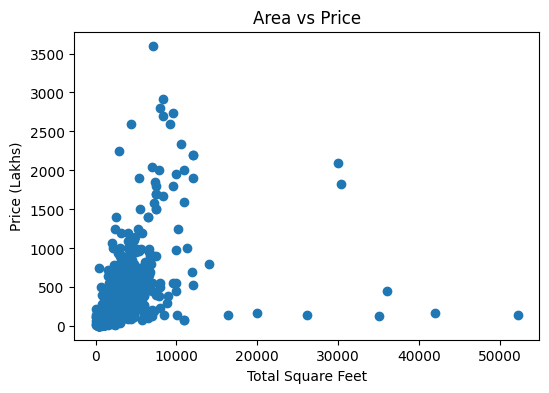

In [39]:
#Exploratory Data Analysis (EDA)
#Price vs Area
plt.figure(figsize=(6,4))
plt.scatter(df['total_sqft'], df['price'])
plt.xlabel("Total Square Feet")
plt.ylabel("Price (Lakhs)")
plt.title("Area vs Price")
plt.show()


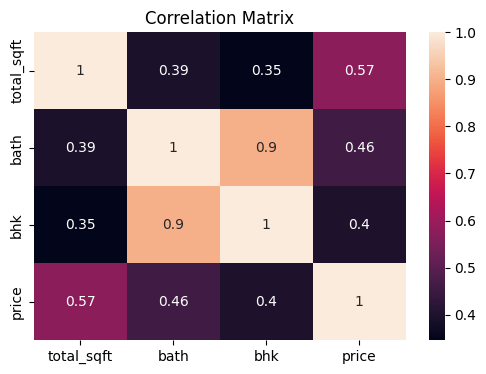

In [40]:
#Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['total_sqft','bath','bhk','price']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [41]:
#Location Feature Reduction
location_stats = df['location'].value_counts()

df['location'] = df['location'].apply(
    lambda x: 'other' if location_stats[x] <= 10 else x
)


In [42]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']


In [43]:
# -------- Outlier Removal --------

# Remove extreme price_per_sqft values
df = df[df['price_per_sqft'] > df['price_per_sqft'].quantile(0.01)]
df = df[df['price_per_sqft'] < df['price_per_sqft'].quantile(0.99)]


In [44]:
#Encode Categorical Data
df = pd.get_dummies(df, drop_first=True)
df.head(15)


,total_sqft,bath,price,bhk,price_per_sqft,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1056.0,2.0,39.07,2,3699.810606,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,120.00,4,4615.384615,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,4305.555556,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.00,3,6245.890861,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,51.00,2,4250.000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,38.00,2,3247.863248,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6,2732.0,4.0,204.00,4,7467.057101,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,3300.0,4.0,600.00,4,18181.818182,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1310.0,3.0,63.25,3,4828.244275,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1800.0,2.0,70.00,3,3888.888889,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [45]:
X = df.drop(['price', 'price_per_sqft'], axis=1)
y = np.log1p(df['price'])



In [46]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [57]:
#Build Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)



In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)


In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Model")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2  :", r2_score(y_test, y_pred))

evaluate_model("Linear Regression", y_test, y_pred)
evaluate_model("Ridge Regression", y_test, ridge_pred)
evaluate_model("Lasso Regression", y_test, lasso_pred)



Linear Regression Model
MAE : 0.2670433924586297
RMSE: 0.3560457391899776
R2  : 0.7158003146632035

Ridge Regression Model
MAE : 0.26660616125042286
RMSE: 0.35489117591961095
R2  : 0.7176404967960833

Lasso Regression Model
MAE : 0.31848330021695487
RMSE: 0.40941210725348215
R2  : 0.6242202526455959


In [51]:
from sklearn.linear_model import Ridge
best_ridge = Ridge(alpha=1.0)   # stable default
best_ridge.fit(X_train, y_train)


,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [52]:
sample = X_test.iloc[[0]]   # double brackets = DataFrame

log_price_pred = best_ridge.predict(sample)
price_pred = np.expm1(log_price_pred)
print("Predicted House Price (in Lakhs):", price_pred[0])


Predicted House Price (in Lakhs): 37.606338617775265


In [53]:
df.to_csv("cleaned_real_estate_data.csv", index=False)


In [54]:
# Create Power BI ready dataset
powerbi_df = X_test.copy()

powerbi_df['Actual_Price_Lakhs'] = np.expm1(y_test.values)
powerbi_df['Predicted_Price_Lakhs'] = np.expm1(best_ridge.predict(X_test))

powerbi_df.to_csv("real_estate_powerbi.csv", index=False)


In [55]:
import pickle
import json

# Save trained Ridge model
with open("ridge_model.pkl", "wb") as f:
    pickle.dump(best_ridge, f)

# Save feature column names (IMPORTANT for Streamlit)
with open("columns.json", "w") as f:
    json.dump(list(X.columns), f)

print("Model and columns saved successfully")


Model and columns saved successfully


In [56]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip
